In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
import seaborn as sns


In [6]:
#Regression analysis to find  out daystotl

In [4]:
df = pd.read_csv('csvs/afterone.csv')
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [44]:
df.select_dtypes('object').nunique()

subunit       9
inspoff      81
state        50
sic          56
canvass       6
aii          25
atype        38
sex           2
occup       129
mwactiv      82
sourcinj    107
natinj       31
partbody     41
deginj       10
injtype       4
coalmetl      2
opercont      2
district     15
commod        7
accinj       17
dtype: int64

In [7]:
df.tail()

,mineid,subunit,month,day,time,inspoff,state,county,sic,canvass,uloc,umeth,minemach,shift,aii,atype,injrep,sex,age,ywtotal,ywmine,ywjob,occup,mwactiv,sourcinj,natinj,partbody,deginj,daysstat,daysrest,dayslost,permtort,retwork,narrcm,timesnce,exptotal,expmine,expjob,injtype,daystotl,coalmetl,opercont,district,commod,accinj
4831,5400137,Mill or preparation plant:Mill prep plant or b...,February,21,13.0,"San Juan, PR",Puerto Rico,91,Traprock (crushed & broken),Stone,Not labeled,0,"Carriage-mounted drills on track, rail, or rub...",6.3,Handling material,Struck by falling object,1,Male,63,45,4100,4100,Drill operator,Inspect equipment,Metal covers and guards,"Unclassified, not determined",Multiple parts,Days away from work only,0,0,5,No,20200302,Metal/Nonmetal/Stone/S&G,6.7500,41.00,41.00,41.00,"NFDL (Nonfatal, days lost)",5,Metal/Nonmetal/Stone/S&G,Operator,"MSE-Southeast-Birmingham, AL",Stone operator,Handling material
4832,5400428,Surface: Strip or open pit mines including as...,January,8,NaN,"San Juan, PR",Puerto Rico,69,"Stone, crushed & broken, NEC",Stone,Not labeled,0,"Front-end loader,tractor-shovel,payloader,high...",NaN,Handling material,Struck by falling object,1,Male,50,5,0,0,"Bulldozer operator, Universal operator, Heavy ...","Handling supplies or material, load and unload",Pulverized mineral,Dust in eyes,Eye(s) (inc. optic nerve & vision),Days away from work only,0,0,6,No,20200117,Metal/Nonmetal/Stone/S&G,#NULL!,3.84,#NULL!,#NULL!,"NFDL (Nonfatal, days lost)",6,Metal/Nonmetal/Stone/S&G,Operator,"MSE-Southeast-Birmingham, AL",Stone operator,Handling material
4833,5400428,Surface: Strip or open pit mines including as...,February,6,NaN,"San Juan, PR",Puerto Rico,69,"Stone, crushed & broken, NEC",Stone,Not labeled,0,0,NaN,Slip or fall of person (from an elevation or o...,Over-exertion NEC,1,Male,25,5,300,8,Welder (shop),Walking/running,Steps,"Sprain, strains",Ankle,Days away from work only,0,0,16,No,20200302,Metal/Nonmetal/Stone/S&G,#NULL!,3.15,3.00,0.15,"NFDL (Nonfatal, days lost)",16,Metal/Nonmetal/Stone/S&G,Operator,"MSE-Southeast-Birmingham, AL",Stone operator,Slip or fall of person
4834,5400447,Surface: Strip or open pit mines including as...,October,16,NaN,"San Juan, PR",Puerto Rico,91,Limestone (crushed and broken),Stone,Not labeled,0,"Dragline,shovel (mining & stripping),power sho...",6.0,Handling material,Over-exertion NEC,1,Male,41,5,500,2000,"Maintenance man, Mechanic, Repair/Serviceman, ...",Machine maint./repair,Surface mining machines,"Sprain, strains",Back,Days away from work only,0,0,171,No,0,Metal/Nonmetal/Stone/S&G,#NULL!,5.00,5.00,20.00,"NFDL (Nonfatal, days lost)",171,Metal/Nonmetal/Stone/S&G,Operator,"MSE-Southeast-Birmingham, AL",Stone operator,Handling material
4835,5400460,Surface: Strip or open pit mines including as...,July,28,14.0,"San Juan, PR",Puerto Rico,97,"Sand, Industrial; Ground silica/quartz",Nonmetal,Not labeled,0,0,6.0,Slip or fall of person (from an elevation or o...,Fall down stairs,1,Male,25,5,100,100,"Outside foreman, Leadman",Walking/running,"Axe, hammer, sledge","Cut, laceration, puncture",Thigh,Days away from work only,0,0,22,No,20200824,Metal/Nonmetal/Stone/S&G,8.0000,1.00,1.00,1.00,"NFDL (Nonfatal, days lost)",22,Metal/Nonmetal/Stone/S&G,Operator,"MSE-Southeast-Birmingham, AL",Nonmetal operator,Slip or fall of person


In [9]:
indexNames = ['mineid', 'month', 'day', 'time', 'county', 'uloc', 'umeth', 'minemach', 'shift', 'injrep', 'ywmine', 'ywjob', 'daysstat', 'daysrest', 'dayslost', 'permtort', 'retwork', 'narrcm', 'timesnce', 'ywtotal', 'expmine', 'expjob']

df.drop(indexNames, inplace=True, axis = 1)


In [10]:
df.head()

,subunit,inspoff,state,sic,canvass,aii,atype,sex,age,occup,mwactiv,sourcinj,natinj,partbody,deginj,exptotal,injtype,daystotl,coalmetl,opercont,district,commod,accinj
0,Mill or preparation plant:Mill prep plant or b...,"Birmingham, AL",Alabama,Lime,Stone,Handling material,Absorption of various noxious substances,Male,42,"Maintenance man, Mechanic, Repair/Serviceman, ...",Walking/running,Acids and alkalies,"Burn, chemical","Lower extremities, multiple",Days of restricted activity only,11.52,"NFDL (Nonfatal, days lost)",2,Metal/Nonmetal/Stone/S&G,Operator,"MSE-Southeast-Birmingham, AL",Stone operator,Handling material
1,Surface: Strip or open pit mines including as...,"Birmingham, AL",Alabama,Lime,Stone,Stepping or kneeling on object,Struck against stationary object,Male,32,"Maintenance man, Mechanic, Repair/Serviceman, ...",Handling explosives,"Broken rock, coal, ore, waste","Sprain, strains",Back,Days of restricted activity only,0.98,"NFDL (Nonfatal, days lost)",32,Metal/Nonmetal/Stone/S&G,Contractor,"MSE-Southeast-Birmingham, AL",Noncoal contractor,Stepping/kneeling on object
2,Surface: Strip or open pit mines including as...,"Birmingham, AL",Alabama,Lime,Stone,Slip or fall of person (from an elevation or o...,Fall to the walkway or working surface,Male,18,"Maintenance man, Mechanic, Repair/Serviceman, ...",Walking/running,Ground,"Sprain, strains",Ankle,Days of restricted activity only,0.10,"NFDL (Nonfatal, days lost)",7,Metal/Nonmetal/Stone/S&G,Contractor,"MSE-Southeast-Birmingham, AL",Noncoal contractor,Slip or fall of person
3,Surface: Strip or open pit mines including as...,"Birmingham, AL",Alabama,Lime,Stone,Handling material,Over-exertion in lifting objects,Male,59,"Crusher attendant/operator, Pan feeder operato...","Handling supplies or material, load and unload",Belt conveyors,"Hernia, rupture",Abdomen,Days away AND restricted activity,15.00,"NFDL (Nonfatal, days lost)",24,Metal/Nonmetal/Stone/S&G,Operator,"MSE-Southeast-Birmingham, AL",Stone operator,Handling material
4,Surface: Strip or open pit mines including as...,"Birmingham, AL",Alabama,Marble (crushed & broken),Stone,Slip or fall of person (from an elevation or o...,Fall to the walkway or working surface,Male,63,"Laborer, Blacksmith, Bull gang, Parts runner, ...",Climb scaffolds/ladders/platforms; headframe/d...,Ground,"Sprain, strains",Shoulder(s),Days away from work only,22.52,"NFDL (Nonfatal, days lost)",258,Metal/Nonmetal/Stone/S&G,Operator,"MSE-Southeast-Birmingham, AL",Stone operator,Slip or fall of person


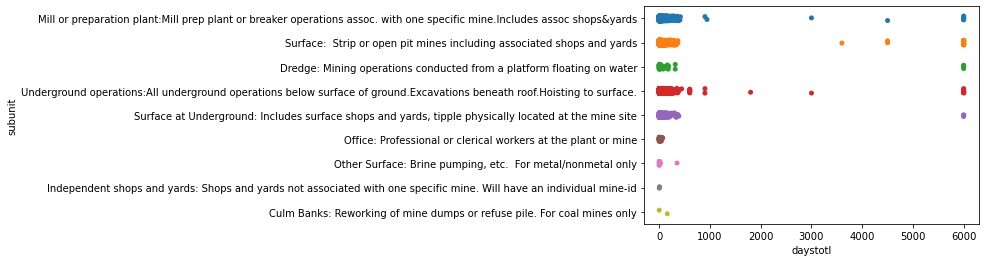

In [11]:
ax = sns.stripplot(x = "daystotl", y = "subunit", data = df)


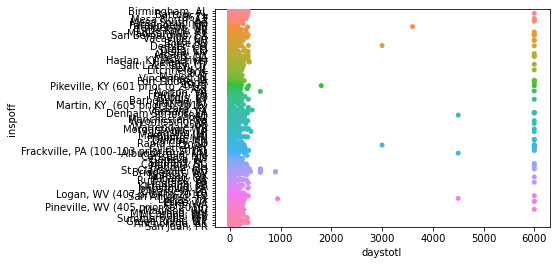

In [14]:
ax = sns.stripplot(x = "daystotl", y = "inspoff", data = df)


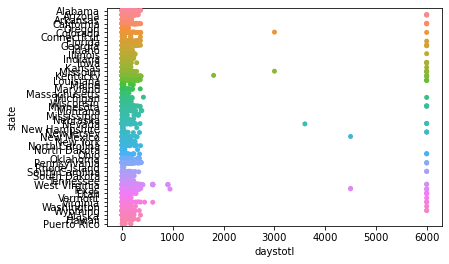

In [15]:
ax = sns.stripplot(x = "daystotl", y = "state", data = df)


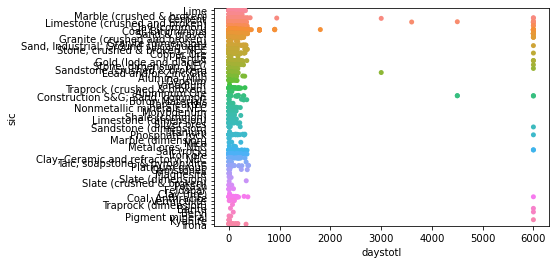

In [16]:
ax = sns.stripplot(x = "daystotl", y = "sic", data = df)


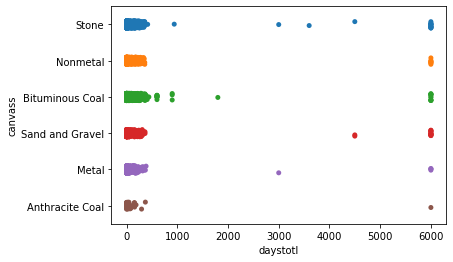

In [17]:
ax = sns.stripplot(x = "daystotl", y = "canvass", data = df)


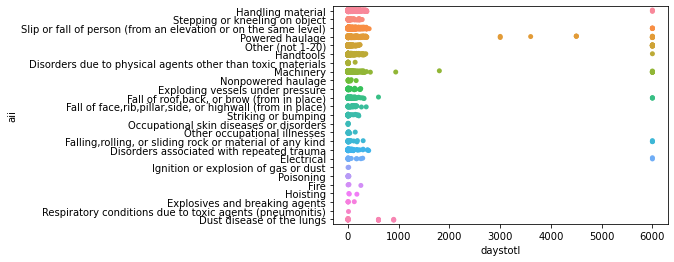

In [18]:
ax = sns.stripplot(x = "daystotl", y = "aii", data = df)


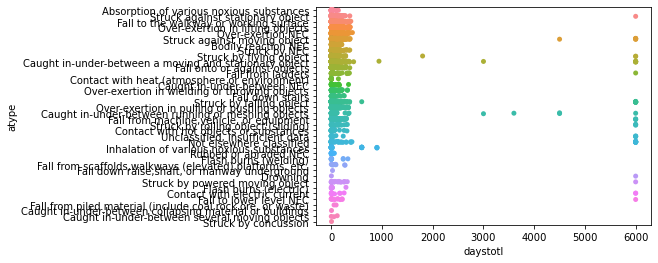

In [19]:
ax = sns.stripplot(x = "daystotl", y = "atype", data = df)


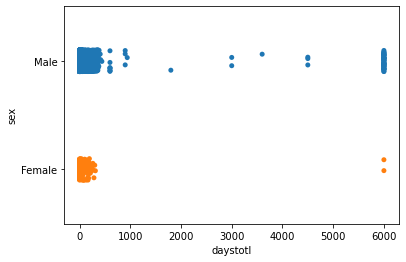

In [20]:
ax = sns.stripplot(x = "daystotl", y = "sex", data = df)


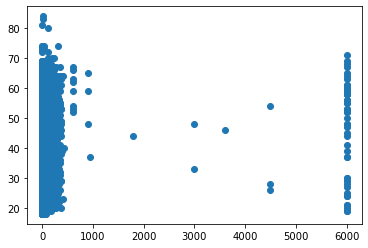

In [22]:
plt.scatter(x = df.daystotl, y = df.age)

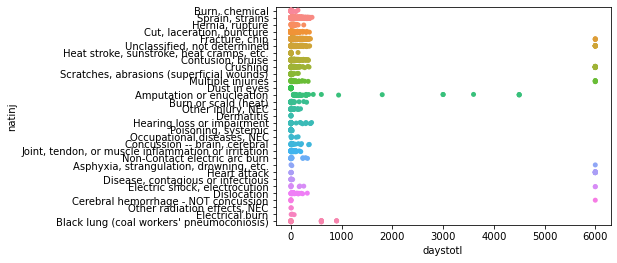

In [23]:
ax = sns.stripplot(x = "daystotl", y = "natinj", data = df)


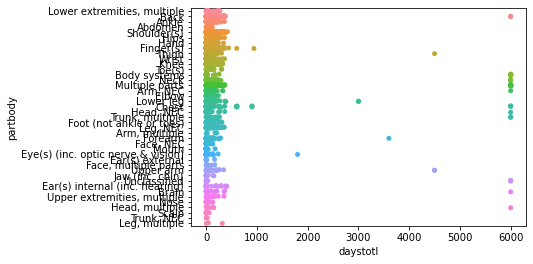

In [24]:
ax = sns.stripplot(x = "daystotl", y = "partbody", data = df)


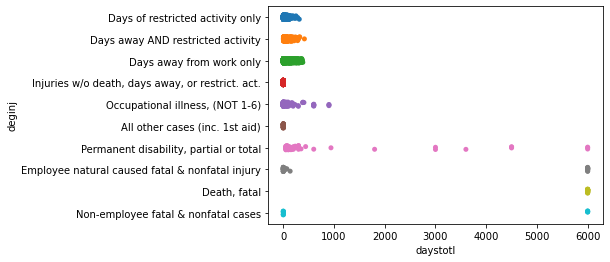

In [25]:
ax = sns.stripplot(x = "daystotl", y = "deginj", data = df)


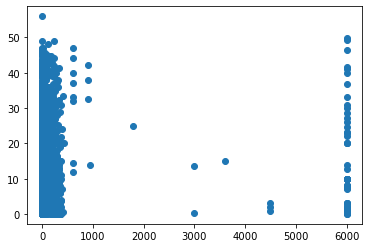

In [26]:
plt.scatter(x = df.daystotl, y = df.exptotal)

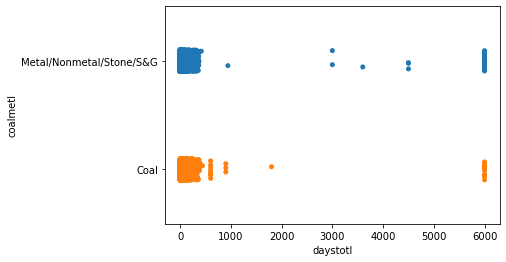

In [27]:
ax = sns.stripplot(x = "daystotl", y = "coalmetl", data = df)


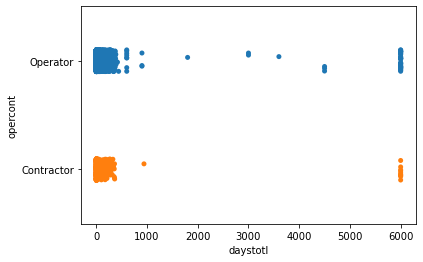

In [29]:
ax = sns.stripplot(x = "daystotl", y = "opercont", data = df)


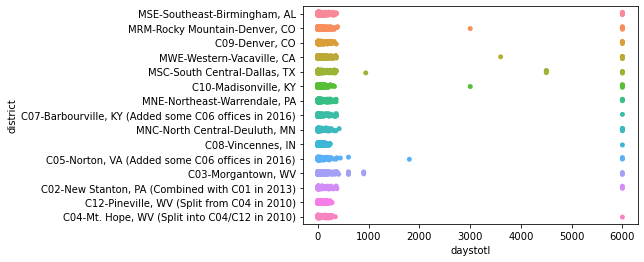

In [30]:
ax = sns.stripplot(x = "daystotl", y = "district", data = df)


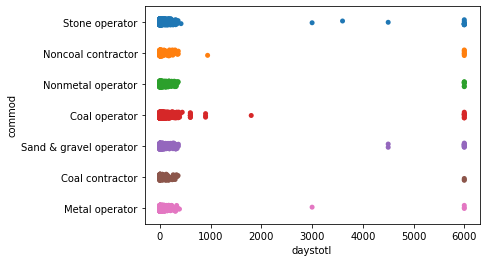

In [31]:
ax = sns.stripplot(x = "daystotl", y = "commod", data = df)


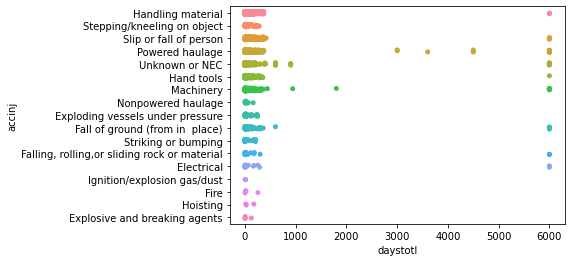

In [32]:
ax = sns.stripplot(x = "daystotl", y = "accinj", data = df)


In [43]:
df.groupby(['partbody']).mean()


,age,exptotal,daystotl
partbody,,,
Abdomen,45.369565,12.820217,38.152174
Ankle,36.040609,6.529582,48.822335
"Arm, NEC",41.709091,8.912138,161.072727
"Arm, multiple",51.600000,13.250000,81.400000
Back,40.558011,9.620217,76.585635
Body systems,42.871795,9.329456,1088.474359
Brain,42.606061,10.542048,233.939394
Chest,49.262712,16.910678,235.737288
Ear(s) external,43.090909,12.910909,15.090909


In [39]:
df.select_dtypes('object').nunique()

subunit       9
inspoff      81
state        50
sic          56
canvass       6
aii          25
atype        38
sex           2
occup       129
mwactiv      82
sourcinj    107
natinj       31
partbody     41
deginj       10
injtype       4
coalmetl      2
opercont      2
district     15
commod        7
accinj       17
dtype: int64

In [40]:
#this shows some of the data cannot be used for regression because of high unique values in some categorical variables
